In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# RANDOM FOREST

(-0.5, 1101.5, 818.5, -0.5)

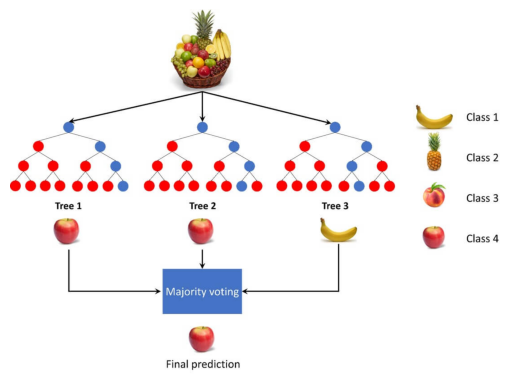

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('random_forest.JPG')
plt.imshow(imagem)
plt.axis('off')

In [25]:
credito = pd.read_csv('Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [26]:
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [27]:
colunas_categoricas = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

for c in colunas_categoricas:
    label_encoder = LabelEncoder()
    previsores[:, c] = label_encoder.fit_transform(previsores[:, c])

In [28]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.2,
                                                                  random_state = 0)

In [29]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [30]:
# Visualização dos atributos principais
floresta.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1181601501),
 DecisionTreeClassifier(max_features='sqrt', random_state=651413934),
 DecisionTreeClassifier(max_features='sqrt', random_state=1298870971),
 DecisionTreeClassifier(max_features='sqrt', random_state=1970983016),
 DecisionTreeClassifier(max_features='sqrt', random_state=1579004673),
 DecisionTreeClassifier(max_features='sqrt', random_state=292117569),
 DecisionTreeClassifier(max_features='sqrt', random_state=2140966316),
 DecisionTreeClassifier(max_features='sqrt', random_state=2131097278),
 DecisionTreeClassifier(max_features='sqrt', random_state=227485258),
 DecisionTreeClassifier(max_features='sqrt', random_state=1484961987),
 DecisionTreeClassifier(max_features='sqrt', random_state=1841968926),
 DecisionTreeClassifier(max_features='sqrt', random_state=1722074931),
 DecisionTreeClassifier(max_features='sqrt', random_state=1402039217),
 DecisionTreeClassifier(max_features='sqrt', random_state=1208349885),
 Decision

In [31]:
floresta.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=651413934)

In [32]:
previsoes = floresta.predict(X_teste)

print(confusion_matrix(y_teste, previsoes))
print(accuracy_score(y_teste, previsoes))

[[ 26  32]
 [ 18 124]]
0.75
